In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import pandas as pd
import glob
import pickle
import numpy as np
from csslconstants import *
from cmcrameri import cm

homedir = '/home/marianne/Documents/cssltimeseries/'
datadir = homedir + 'data/'
os.chdir(homedir)

datakeys = ['Date', 'Air Temp Max (C)', 'Air Temp Min (C)',
       '24-hour Total Precip (mm)', 'Season Total Precip (mm)',
       '% of Precip as Snow', '% of Precip as Rain', 'New Snow (cm)',
       'Season Total Snow (cm)', 'Snowpack depth (cm)',
       'Snow Water Equivalent (cm)', 'Remarks', 'dt']


In [20]:
## load data from the prep_cssl_data.py process
with open(datadir + 'cssldata.pickle', 'rb') as handle:
    cssl = pickle.load(handle)

allanoms = pd.read_csv(datadir + 'allanoms.csv',index_col=0)
csslmonthly = pd.read_csv(datadir + 'csslmonthly.csv',index_col=0)
month_anom = pd.read_csv(datadir + 'monthlytemperatureanoms.csv',index_col=0)
teleconnections = pd.read_csv(datadir + 'teleconnections.csv',index_col=0)
nino34 = pd.read_csv(datadir + 'elnino.csv',index_col=0)
maxwy = pd.read_csv(datadir + 'max_by_wy.csv',index_col=0)

Text(0.5, 0, 'depth')

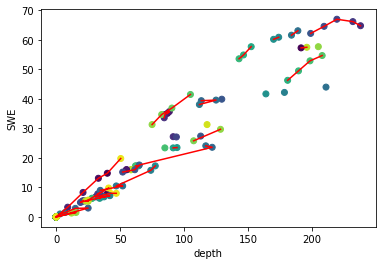

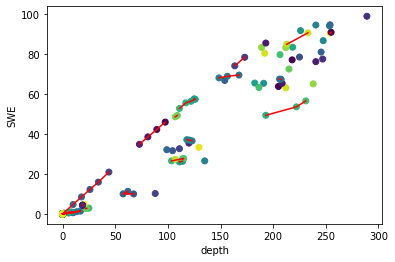

In [5]:
fig,ax=plt.subplots()
for k in ['2001']: # cssl.keys():
    data = cssl[k]
    x = pd.Series(data['Snowpack depth (cm)'].astype('float'))
    y = pd.Series(data['Snow Water Equivalent (cm)'].astype('float'))
    tmp = pd.Series(data['dt'])
    z =  [t.day for t in tmp]
    y.index = index=data['dt']
    ax.scatter(x,y,c= z, label=k)
    ax.plot(x,y,color='r')

# ax.legend()
ax.set_ylabel('SWE')
ax.set_xlabel('depth')

fig,ax=plt.subplots()
for k in ['2010']: # cssl.keys():
    data = cssl[k]
    x = pd.Series(data['Snowpack depth (cm)'].astype('float'))
    y = pd.Series(data['Snow Water Equivalent (cm)'].astype('float'))
    tmp = pd.Series(data['dt'])
    z =  [t.day for t in tmp]
    y.index = index=data['dt']
    ax.scatter(x,y,c= z, label=k)
    ax.plot(x,y,color='r')

# ax.legend()
ax.set_ylabel('SWE')
ax.set_xlabel('depth')


In [240]:
## monthly anomalies for the data

allkeys = list(csslmonthly.keys())
newkeys = []
for k in allkeys:
    for i in range(1,13):
        newkey = k + '_a_' + str(i)
        newkeys.append(newkey)
#anomalykeys = [k+'_a' for k in allkeys]
#aak = allkeys + anomalykeys
#for k in anomalykeys:
#    alldata_monthly[k] = ''

month_anom = csslmonthly.reindex(columns = csslmonthly.columns.tolist() + newkeys)
#allkeys = alldata_monthly.keys()
#anomalykeys = [k+'_a' for k in allkeys]
for m in range(1,13):
    monthdata = csslmonthly.loc[csslmonthly.index.month==m]
    idxs = monthdata.index
    for k in allkeys[0:10]:
        tmp = monthdata[k]
        month_avg = np.nanmean(tmp)
        anomdata = [v-month_avg for v in tmp]
        adata_df = pd.DataFrame(data = anomdata, index = idxs)
        month_anom[k+'_a_'+str(m)] = adata_df



/tmp/ipykernel_135282/1006388158.py:23: RuntimeWarning: Mean of empty slice
  month_avg = np.nanmean(tmp)


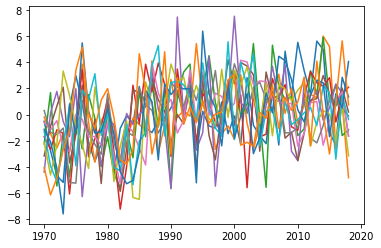

In [9]:
fig,ax=plt.subplots()
anoms = pd.DataFrame()
for i in range(1,13):
    label = 'anom'+str(i)
    ts_tmp = month_anom['anom'+str(i)]
    ts_tmp.plot(ax=ax)



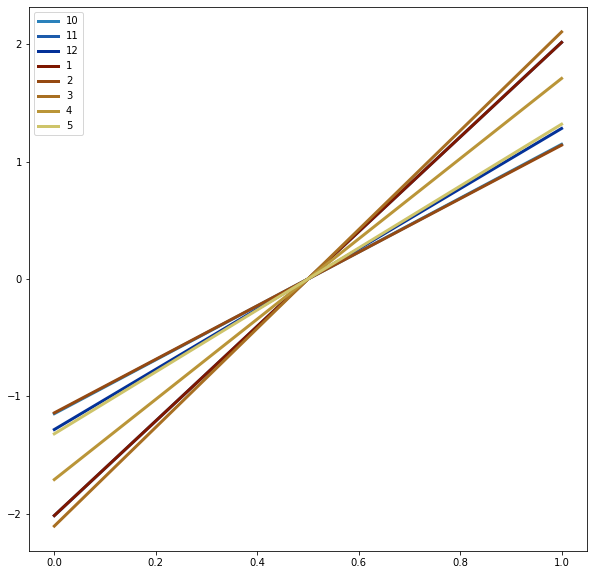

In [14]:
from sklearn.linear_model import LinearRegression
colors = cm.roma(np.linspace(0,1,12))
fig,ax=plt.subplots(figsize=(10,10))
for i in [10,11,12,1,2,3,4,5]:
    y = month_anom[month_anom.keys()[i-1]].values.reshape(-1,1)
    x = np.linspace(0,1,len(y)).reshape(-1,1)
    regressor = LinearRegression()
    regressor.fit(x,y)
    ax.plot(x, regressor.predict(x), linewidth=3, label = str(i),color=colors[i-1])
ax.legend()
plt.show()


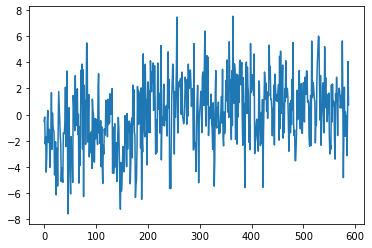

In [16]:
plt.plot(allanoms)

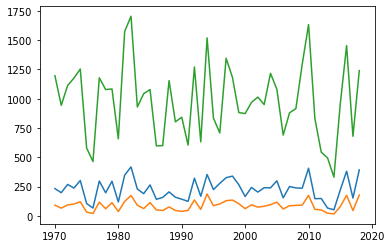

In [22]:
fig,ax=plt.subplots()
ax.plot(maxwy.index,maxwy.maxdepth)
ax.plot(maxwy.index,maxwy.maxswe)
ax.plot(maxwy.index,maxwy.totalsnow)
plt.show()

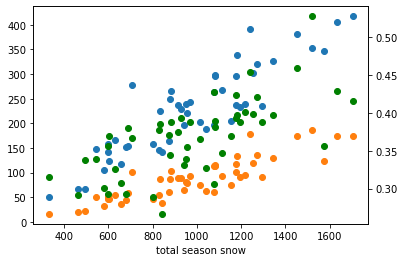

In [23]:
fig,ax=plt.subplots()
ax.plot(maxwy.totalsnow,maxwy.maxdepth,'o',label='depth')
ax.plot(maxwy.totalsnow,maxwy.maxswe,'o',label = 'swe')
ax2 = ax.twinx()
ax2.plot(maxwy.totalsnow,maxwy.maxswe/maxwy.maxdepth,'o',label='density',color='green')
ax.set_xlabel('total season snow')
plt.show()


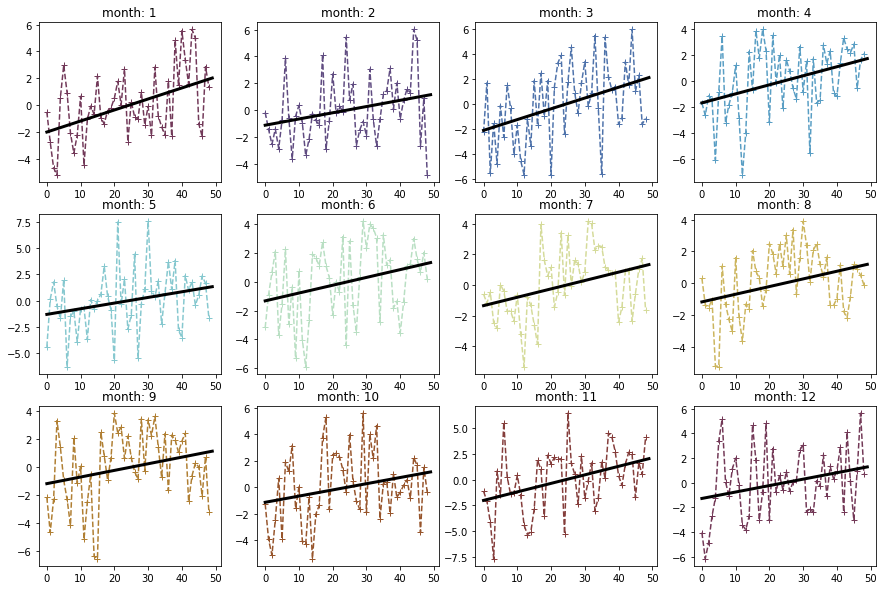

In [49]:
fig,ax=plt.subplots(3,4,figsize=(15,10))
axs = ax.flatten()
colors = cm.romaO_r(np.linspace(0,1,12))
anoms = pd.DataFrame()
for i in range(1,13):
    label = 'anom'+str(i)
    ts_tmp = month_anom['anom'+str(i)].values # .loc[month_anom.index.month==i]
    axs[i-1].plot(ts_tmp,'+--',color=colors[i-1])
    axs[i-1].set_title('month: '+str(i))
    y =ts_tmp.reshape(-1,1)
    x = np.linspace(0,len(y),len(y)).reshape(-1,1)
    regressor = LinearRegression()
    regressor.fit(x,y)
    axs[i-1].plot(x, regressor.predict(x), linewidth=3, label = str(i),color='k')